# Solve TSP using Cuckoo Search (CS) algorithm
The Cuckoo Search (CS) algorithm is a metaheuristic optimization algorithm developed by Xin-she Yang and Suash Deb in 2009. It is inspired by the brooding behavior of some cuckoo species.

To apply this algorithm to the Traveling Salesman Problem (TSP), we will define each "nest" as a sequence of cities (a path). The "quality" of a nest will be the total distance of the path; our goal is to minimize this distance.

Before we start, we'll need the following libraries:

- Numpy: For numerical computation
- Matplotlib: For visualizing our results
- Random: For generating random numbers

Here's a brief overview of how we'll approach this problem:

1. **Initialization**: Generate a population of random paths (nests)
2. **Cuckoo update**: Select a random nest and modify it (create a new solution)
3. **Quality assessment**: If the new solution is better, replace the nest with the new solution
4. **Eliminate worst nests**: Some fraction of the worst solutions are replaced with new, random solutions
5. **Iterate**: Repeat steps 2-4 until some stopping condition is met (e.g., maximum number of iterations, solution is good enough, etc.)

Now, let's proceed with the step by step code:

## Step 1: Importing Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Step 2: Initialize Parameters

Before we start the optimization process, we need to set some parameters. In this case, we'll set the number of cities, the number of nests, the maximum number of iterations, and the fraction of nests we want to abandon.

In [13]:
# Parameters
num_cities = 50  # Number of cities
num_nests = 100  # Number of nests
max_iter = 1000  # Maximum number of iterations
pa = 0.25  # Fraction of worst nests to abandon

## Step 3: Generate Initial Population

Now we create our initial population of nests, which are simply random sequences of cities.

In [14]:
# Initialization
nests = [np.random.permutation(num_cities) for _ in range(num_nests)]

# Generate city coordinates
np.random.seed(42)  # for reproducibility
cities = np.random.rand(num_cities, 2)  # 2D coordinates

# Calculate distances
dist = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(i+1, num_cities):
        # Euclidean distance
        dist[i, j] = dist[j, i] = np.sqrt(np.sum((cities[i] - cities[j])**2))

**Step 4: Define Helper Functions**

Next, we need some helper functions to compute the total distance of a path, generate a new solution from an existing one, and replace the worst nests.

In [17]:
# Function to calculate total distance
def path_dist(path):
    return sum(dist[path[i-1], path[i]] for i in range(num_cities))

# Function to generate a new solution (path)
def get_new_path(path):
    path = path.copy()
    i, j = random.sample(range(num_cities), 2)  # Pick two cities
    path[i], path[j] = path[j], path[i]  # Swap them
    return path

# Function to replace worst nests
def replace_worst_nests(nests, new_nests):
    # Calculate nest qualities
    nest_qualities = [path_dist(nest) for nest in nests]
    # Get indices of worst nests
    worst_nests = np.argsort(nest_qualities)[-int(pa*num_nests):]
    # Replace worst nests with new ones
    for i in worst_nests:
        nests[i] = new_nests[i]
    return nests

## Step 5: Main Loop

Finally, we can now run the main loop of our algorithm. At each iteration, we create new solutions for each nest, assess their quality, and replace the worst nests.

In [21]:
# Main loop
for _ in range(max_iter):
    # Generate new solutions
    new_nests = [get_new_path(nest) for nest in nests]
    # Replace nests if new solution is better
    for i in range(num_nests):
        if path_dist(new_nests[i]) < path_dist(nests[i]):
            nests[i] = new_nests[i]
    # Replace worst nests with new, random ones
    nests = replace_worst_nests(nests, [np.random.permutation(num_cities) for _ in range(num_nests)])

# Find the best path
best_path = min(nests, key=path_dist)

Step 6: Show plot

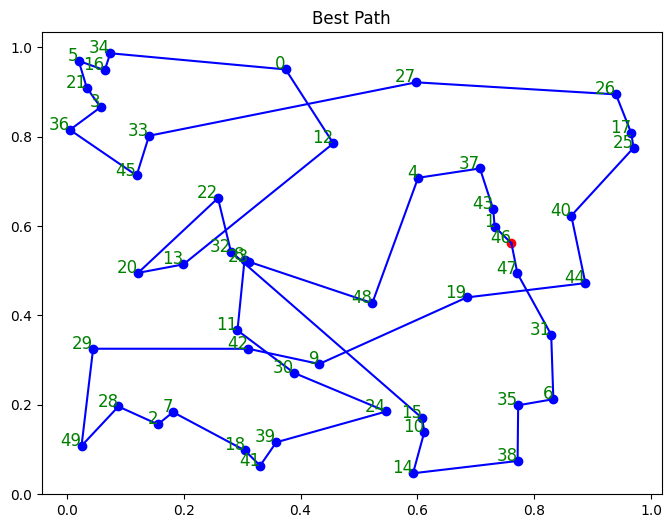

In [22]:
# Function to plot the cities and the path
def plot_path(cities, path):
    plt.figure(figsize=(8, 6))

    # plot the cities as points
    for i in range(num_cities):
        if i == path[0]:  # if it's the first city in the path
            plt.scatter(cities[i, 0], cities[i, 1], color='r')
        else:
            plt.scatter(cities[i, 0], cities[i, 1], color='b')

        # annotate the city number
        plt.text(cities[i, 0], cities[i, 1], str(i), color='green', fontsize=12, ha='right')

    # plot the path
    for i in range(-1, num_cities-1):  
        plt.plot(*zip(cities[path[i]], cities[path[i+1]]), color='b')

    plt.title('Best Path')
    plt.show()

plot_path(cities, best_path)

## Final Step
showing output for migrating to bigger project.

In [23]:
print("Best path:", best_path)
print("Total distance:", path_dist(best_path))

Best path: [46  1 43 37  4 48 23  8 11 30 24 39 41 18  7  2 28 49 29 42  9 19 44 40
 25 17 26 27 33 45 36  3 21  5 16 34  0 12 13 20 22 32 15 10 14 38 35  6
 31 47]
Total distance: 7.500911638405274
